# Energy generation Prediction

## Objective

The primary objective of this project is to analyze energy generation trends using data related to various fuel types. By examining the generation patterns, we aim to gain insights into the efficiency and consistency of energy sources such as hydroelectric power, helping stakeholders make informed decisions for sustainable energy planning. 

## Problem Statement

With the increasing demand for renewable energy sources, it is crucial to assess the performance and contribution of different fuel types to the overall energy grid. This project addresses the need to:
- Understand the hourly trends in energy generation.
- Evaluate the consistency of energy production from renewable sources like hydroelectric power.
- Identify potential opportunities for optimizing energy output and resource utilization.

## Data Description 

Below is a brief description of the data fields:

- **respondent**: The region or entity reporting the data.
- **respondent-name**: Full name of the respondent.
- **fueltype**: Code representing the type of fuel used.
- **type-name**: Full name of the fuel type.
- **value**: The amount of energy generated.
- **value-units**: Units of energy measurement.
- **period**: The timestamp for the recorded data.

The provided dataset focuses on hydroelectric energy generation in New York for January 2022-24 extracted from **eia.gov**, offers an opportunity to analyze trends and variations in production across different time intervals. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import plotly.express as px
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight') 

In [3]:
data = pd.read_csv("/home/karthikponna/kittu/Energy generation prediction project/Energy-Generation-Predictor-MLops/data/dataset/EnergyData.csv",index_col=[0],
                  parse_dates=[0])
data = data.sort_index()
data.head()

,respondent,respondent-name,fueltype,type-name,value,value-units
period,,,,,,
2022-01-01 00:00:00,NY,New York,WAT,Hydro,3962,megawatthours
2022-01-01 01:00:00,NY,New York,WAT,Hydro,3970,megawatthours
2022-01-01 02:00:00,NY,New York,WAT,Hydro,3963,megawatthours
2022-01-01 03:00:00,NY,New York,WAT,Hydro,3750,megawatthours
2022-01-01 04:00:00,NY,New York,WAT,Hydro,3513,megawatthours


In [4]:
data.tail()

,respondent,respondent-name,fueltype,type-name,value,value-units
period,,,,,,
2024-11-30 20:00:00,NY,New York,WAT,Hydro,2972,megawatthours
2024-11-30 21:00:00,NY,New York,WAT,Hydro,3387,megawatthours
2024-11-30 22:00:00,NY,New York,WAT,Hydro,3591,megawatthours
2024-11-30 23:00:00,NY,New York,WAT,Hydro,3630,megawatthours
2024-12-01 00:00:00,NY,New York,WAT,Hydro,3590,megawatthours


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25561 entries, 2022-01-01 00:00:00 to 2024-12-01 00:00:00
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   respondent       25561 non-null  object
 1   respondent-name  25561 non-null  object
 2   fueltype         25561 non-null  object
 3   type-name        25561 non-null  object
 4   value            25561 non-null  int64 
 5   value-units      25561 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [6]:
data.describe()

,value
count,25561.000000
mean,3036.591409
std,625.980099
min,0.000000
25%,2577.000000
50%,3106.000000
75%,3506.000000
max,5231.000000


In [7]:
print(f"Values in respondent: {data['respondent'].value_counts()}")
print(f"Values in respondent-name: {data['respondent-name'].value_counts()}")
print(f"Values in fueltype: {data['fueltype'].value_counts()}")
print(f"Values in type-name: {data['type-name'].value_counts()}")
print(f"Values in value-units: {data['value-units'].value_counts()}")

Values in respondent: respondent
NY    25561
Name: count, dtype: int64
Values in respondent-name: respondent-name
New York    25561
Name: count, dtype: int64
Values in fueltype: fueltype
WAT    25561
Name: count, dtype: int64
Values in type-name: type-name
Hydro    25561
Name: count, dtype: int64
Values in value-units: value-units
megawatthours    25561
Name: count, dtype: int64


## Data Insights

Based on the analysis of the dataset, the following insights were derived:

1. **Data Overview**:
   - The dataset contains **25,561 entries** spanning from `2022-01-01 00:00:00` to `2024-12-01 00:00:00`.
   - It records energy generation values measured in `megawatthours`.

2. **Statistical Summary**:
   - **Average Energy Generation**: The mean value of energy generation is approximately **3036.59 megawatthours**.
   - **Variation**: 
     - The standard deviation of **625.98 megawatthours** indicates moderate variability in energy generation over the time period.
     - Minimum value: **0 megawatthours** (indicating periods of no generation).
     - Maximum value: **5231 megawatthours** (indicating the peak generation observed).
   - **Distribution**:
     - 25% of the energy generation values fall below **2577 megawatthours**.
     - The median value (50th percentile) is **3106 megawatthours**, suggesting that half of the records show energy generation above this level.
     - 75% of the energy generation values are below **3506 megawatthours**, indicating that extreme high values are relatively rare.

3. **Columns Selected for Analysis**:
   - For simplicity and focused analysis, only the `period` and `value` columns are retained. These columns will allow us to analyze the temporal trends and variations in energy generation effectively.

4. **Potential Focus Areas**:
   - Identify trends in energy generation over time (e.g., seasonal or daily patterns).
   - Examine periods of no generation or peak generation for operational insights.
   - Evaluate the consistency of energy production to ensure reliability in supply.

By narrowing down the dataset to the most relevant columns and focusing on the key metrics, the analysis aims to uncover meaningful trends and actionable insights for energy planning and optimization.


In [6]:
df = data['value']
df.head()

period
2022-01-01 00:00:00    3962
2022-01-01 01:00:00    3970
2022-01-01 02:00:00    3963
2022-01-01 03:00:00    3750
2022-01-01 04:00:00    3513
Name: value, dtype: int64

In [7]:
print(type(df)) 
print(df.shape) 

<class 'pandas.core.series.Series'>
(25561,)


In [22]:
px.histogram(df,x='value',nbins=500)

In [9]:
import plotly.express as px
px.line(data.index, x='period', y=data['value'],title='Energy generation in MW')

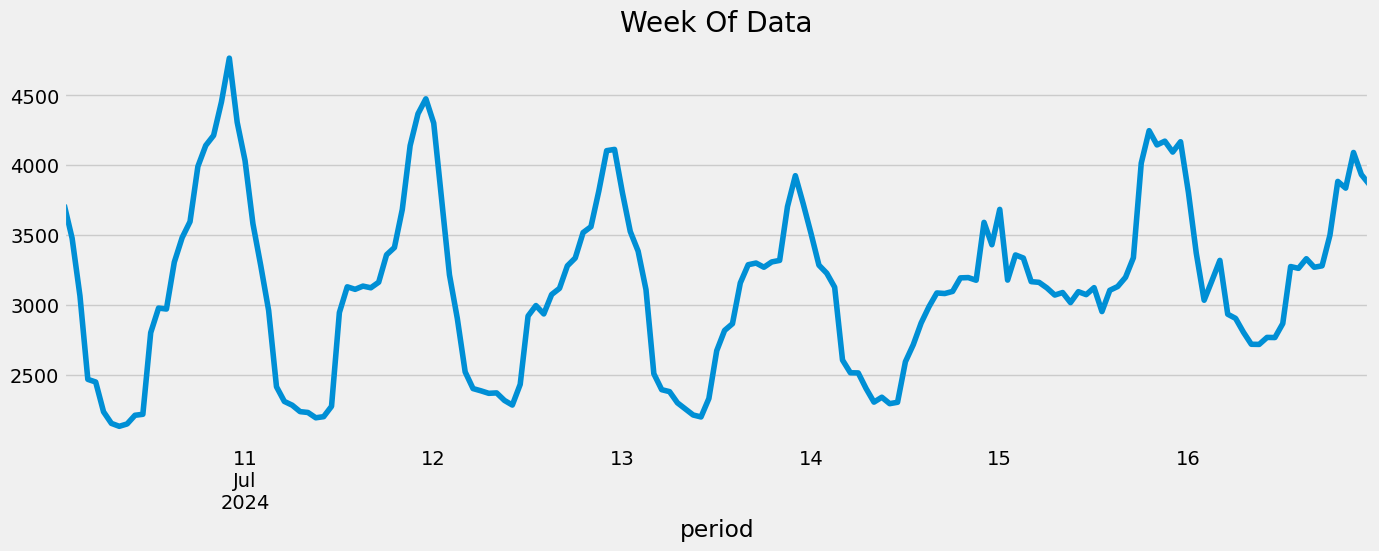

In [10]:
df.loc[(df.index > '07-10-2024') & (df.index < '07-17-2024')]\
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

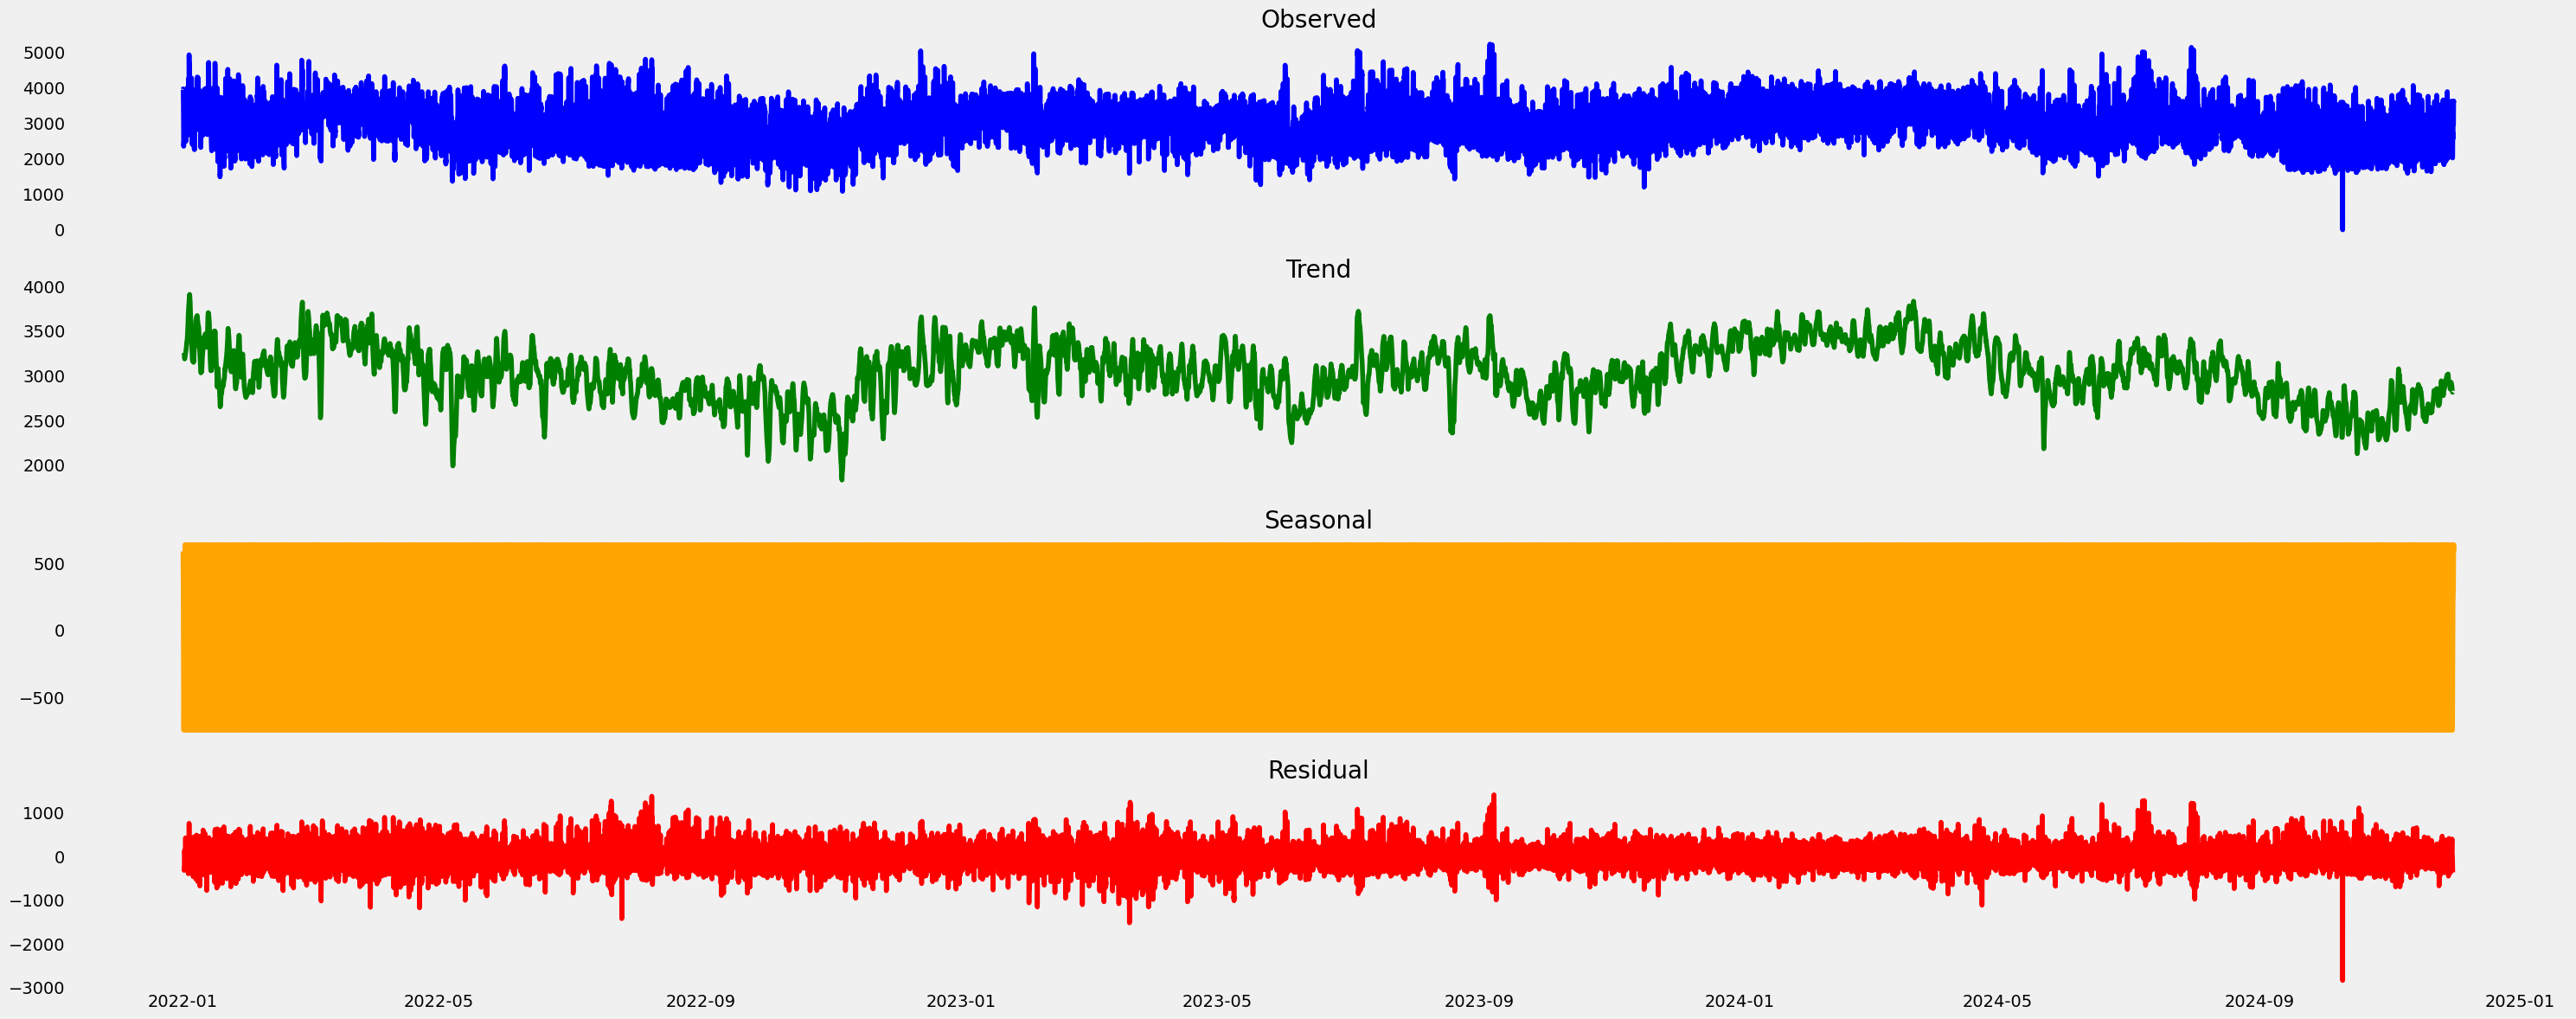

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Step 1: Perform seasonal decomposition
results = seasonal_decompose(df , model='additive', period=24)

# Extract components
observed = results.observed
trend = results.trend
seasonal = results.seasonal
residual = results.resid

# Step 2: Create subplots
fig, axes = plt.subplots(4, 1, figsize=(30, 12), sharex=True)

# Observed component
axes[0].plot(df.index, observed, color='blue')
axes[0].set_title('Observed')
axes[0].grid()

# Trend component
axes[1].plot(df.index, trend, color='green')
axes[1].set_title('Trend')
axes[1].grid()

# Seasonal component
axes[2].plot(df.index, seasonal, color='orange')
axes[2].set_title('Seasonal')
axes[2].grid()

# Residual component
axes[3].plot(df.index, residual, color='red')
axes[3].set_title('Residual')
axes[3].grid()

# Adjust layout
plt.tight_layout()

# Save the figure as an image file
# plt.savefig("seasonal_decomposition.png")
# print("Plot saved as 'seasonal_decomposition.png'. Open it to view.")
plt.show()


**Check for Stationarity**

Stationary time series (constant mean and variance) are often required for models like ARIMA.

Dickey-Fuller Test

Stationarity - Lag - Autocorrleation¶ Stationarity For forecasting purposes, it is desirable for a time series to exhibit stationarity. In a stationary time series, the mean, variance, and covariance remain constant over time. Stationarity is important because it allows us to make reliable predictions based on the assumption that the future behavior of the time series will be similar to its past behavior.

When a time series is non-stationary, it may exhibit trends, seasonality, or other patterns that can make forecasting challenging. In such cases, it becomes necessary to transform the time series to achieve stationarity before applying forecasting models.

Common techniques for achieving stationarity include taking first differences to remove trends or applying transformations such as logarithmic to stabilize the variance. Once stationarity is achieved, forecasting models can be effectively applied to make accurate predictions.

By ensuring stationarity in a time series, we can rely on the assumption that the statistical properties of the series will remain consistent, enabling us to generate reliable forecasts for future observations.

There are several statistical tests available to determine the stationarity of a time series. Here we are going to use Augmented Dickey-Fuller (ADF) Test. The ADF tests the null hypothesis that a unit root is present in the time series (indicating non-stationarity). A unit root implies that the autoregressive coefficient in the lagged values of the series is equal to 1. This means that the effect of past values on the current value of the time series does not decay over time. If the p-value obtained from the ADF test is below a chosen significance level (e.g., 0.05), we can reject the null hypothesis and conclude that the series is stationary. 

In [12]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df)

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(f"{key}: {value}")

# Interpret the results
if result[1] <= 0.05:
    print("The df is stationary.")
else:
    print("The df is non-stationary. Differencing is required.")


ADF Statistic: -10.090174802039218
p-value: 1.1276087999007714e-17
Critical Values:
1%: -3.430606348310086
5%: -2.8616532982918876
10%: -2.566830305350621
The df is stationary.


Since the ADF statistic is much smaller than the critical values, and the p-value is close to zero, we can reject the null hypothesis of the ADF test.

The null hypothesis states that the time series is non-stationary. Rejecting it implies that the series is stationary.

Time Series Features

In [20]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = data.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week

    df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], 
                          labels=['Spring', 'Summer', 'Fall', 'Winter']
                   )
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','weekday',
           'season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(data, label='value')
features_and_target = pd.concat([X, y], axis=1)

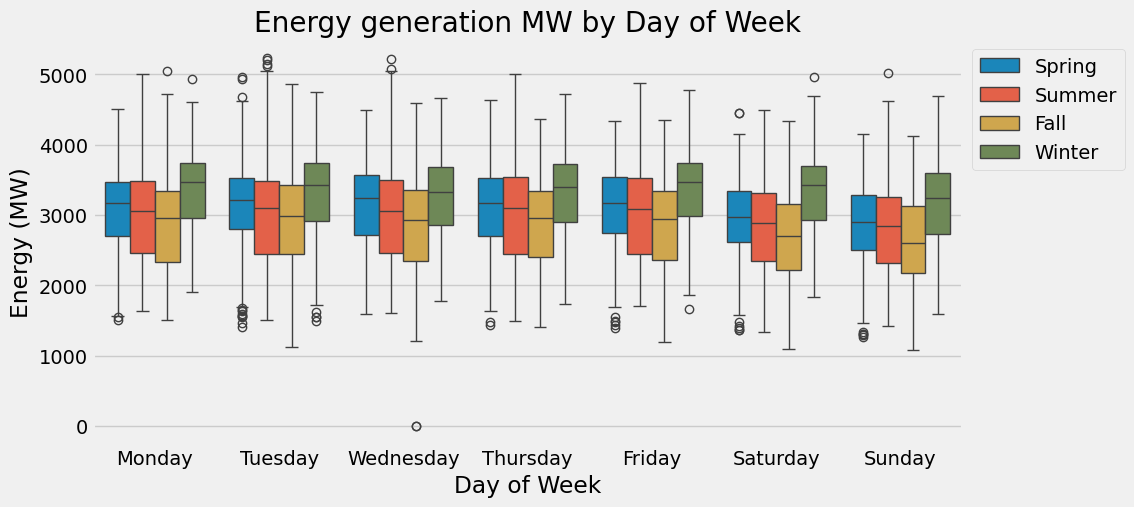

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='weekday',
            y='value',
            hue='season',
            ax=ax,
            linewidth=1)
ax.set_title('Energy generation MW by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Energy (MW)')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

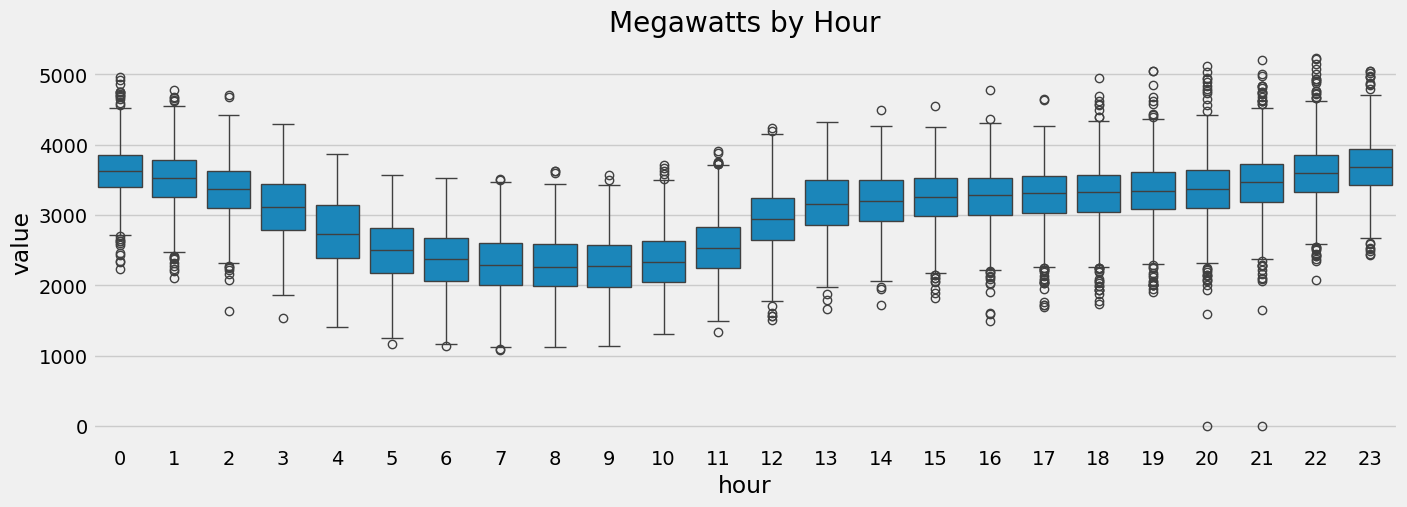

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(figsize=(15, 5))

# Boxplot with correct columns and DataFrame passed as 'data'
sns.boxplot(data=df, x='hour', y='value', ax=ax)

# Set the title
ax.set_title('Megawatts by Hour')

# Show the plot
plt.show() 

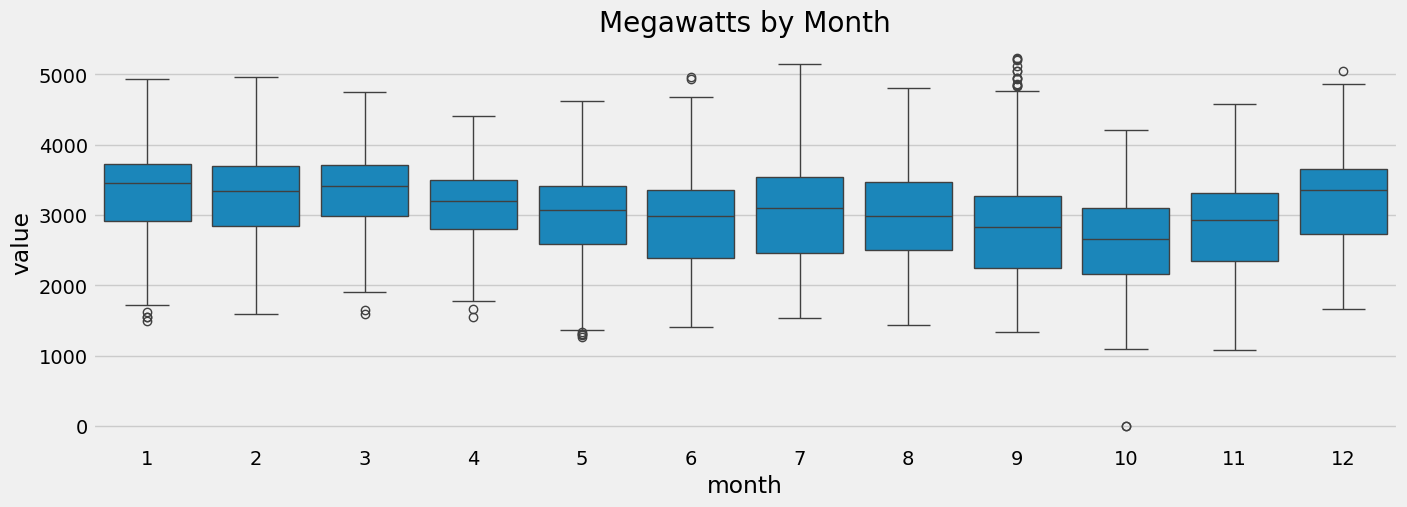

In [79]:
 # Now plot the boxplot with 'month' as x and 'value' as y
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df, x='month', y='value', ax=ax)

# Set title
ax.set_title('Megawatts by Month')

# Show the plot
plt.show()

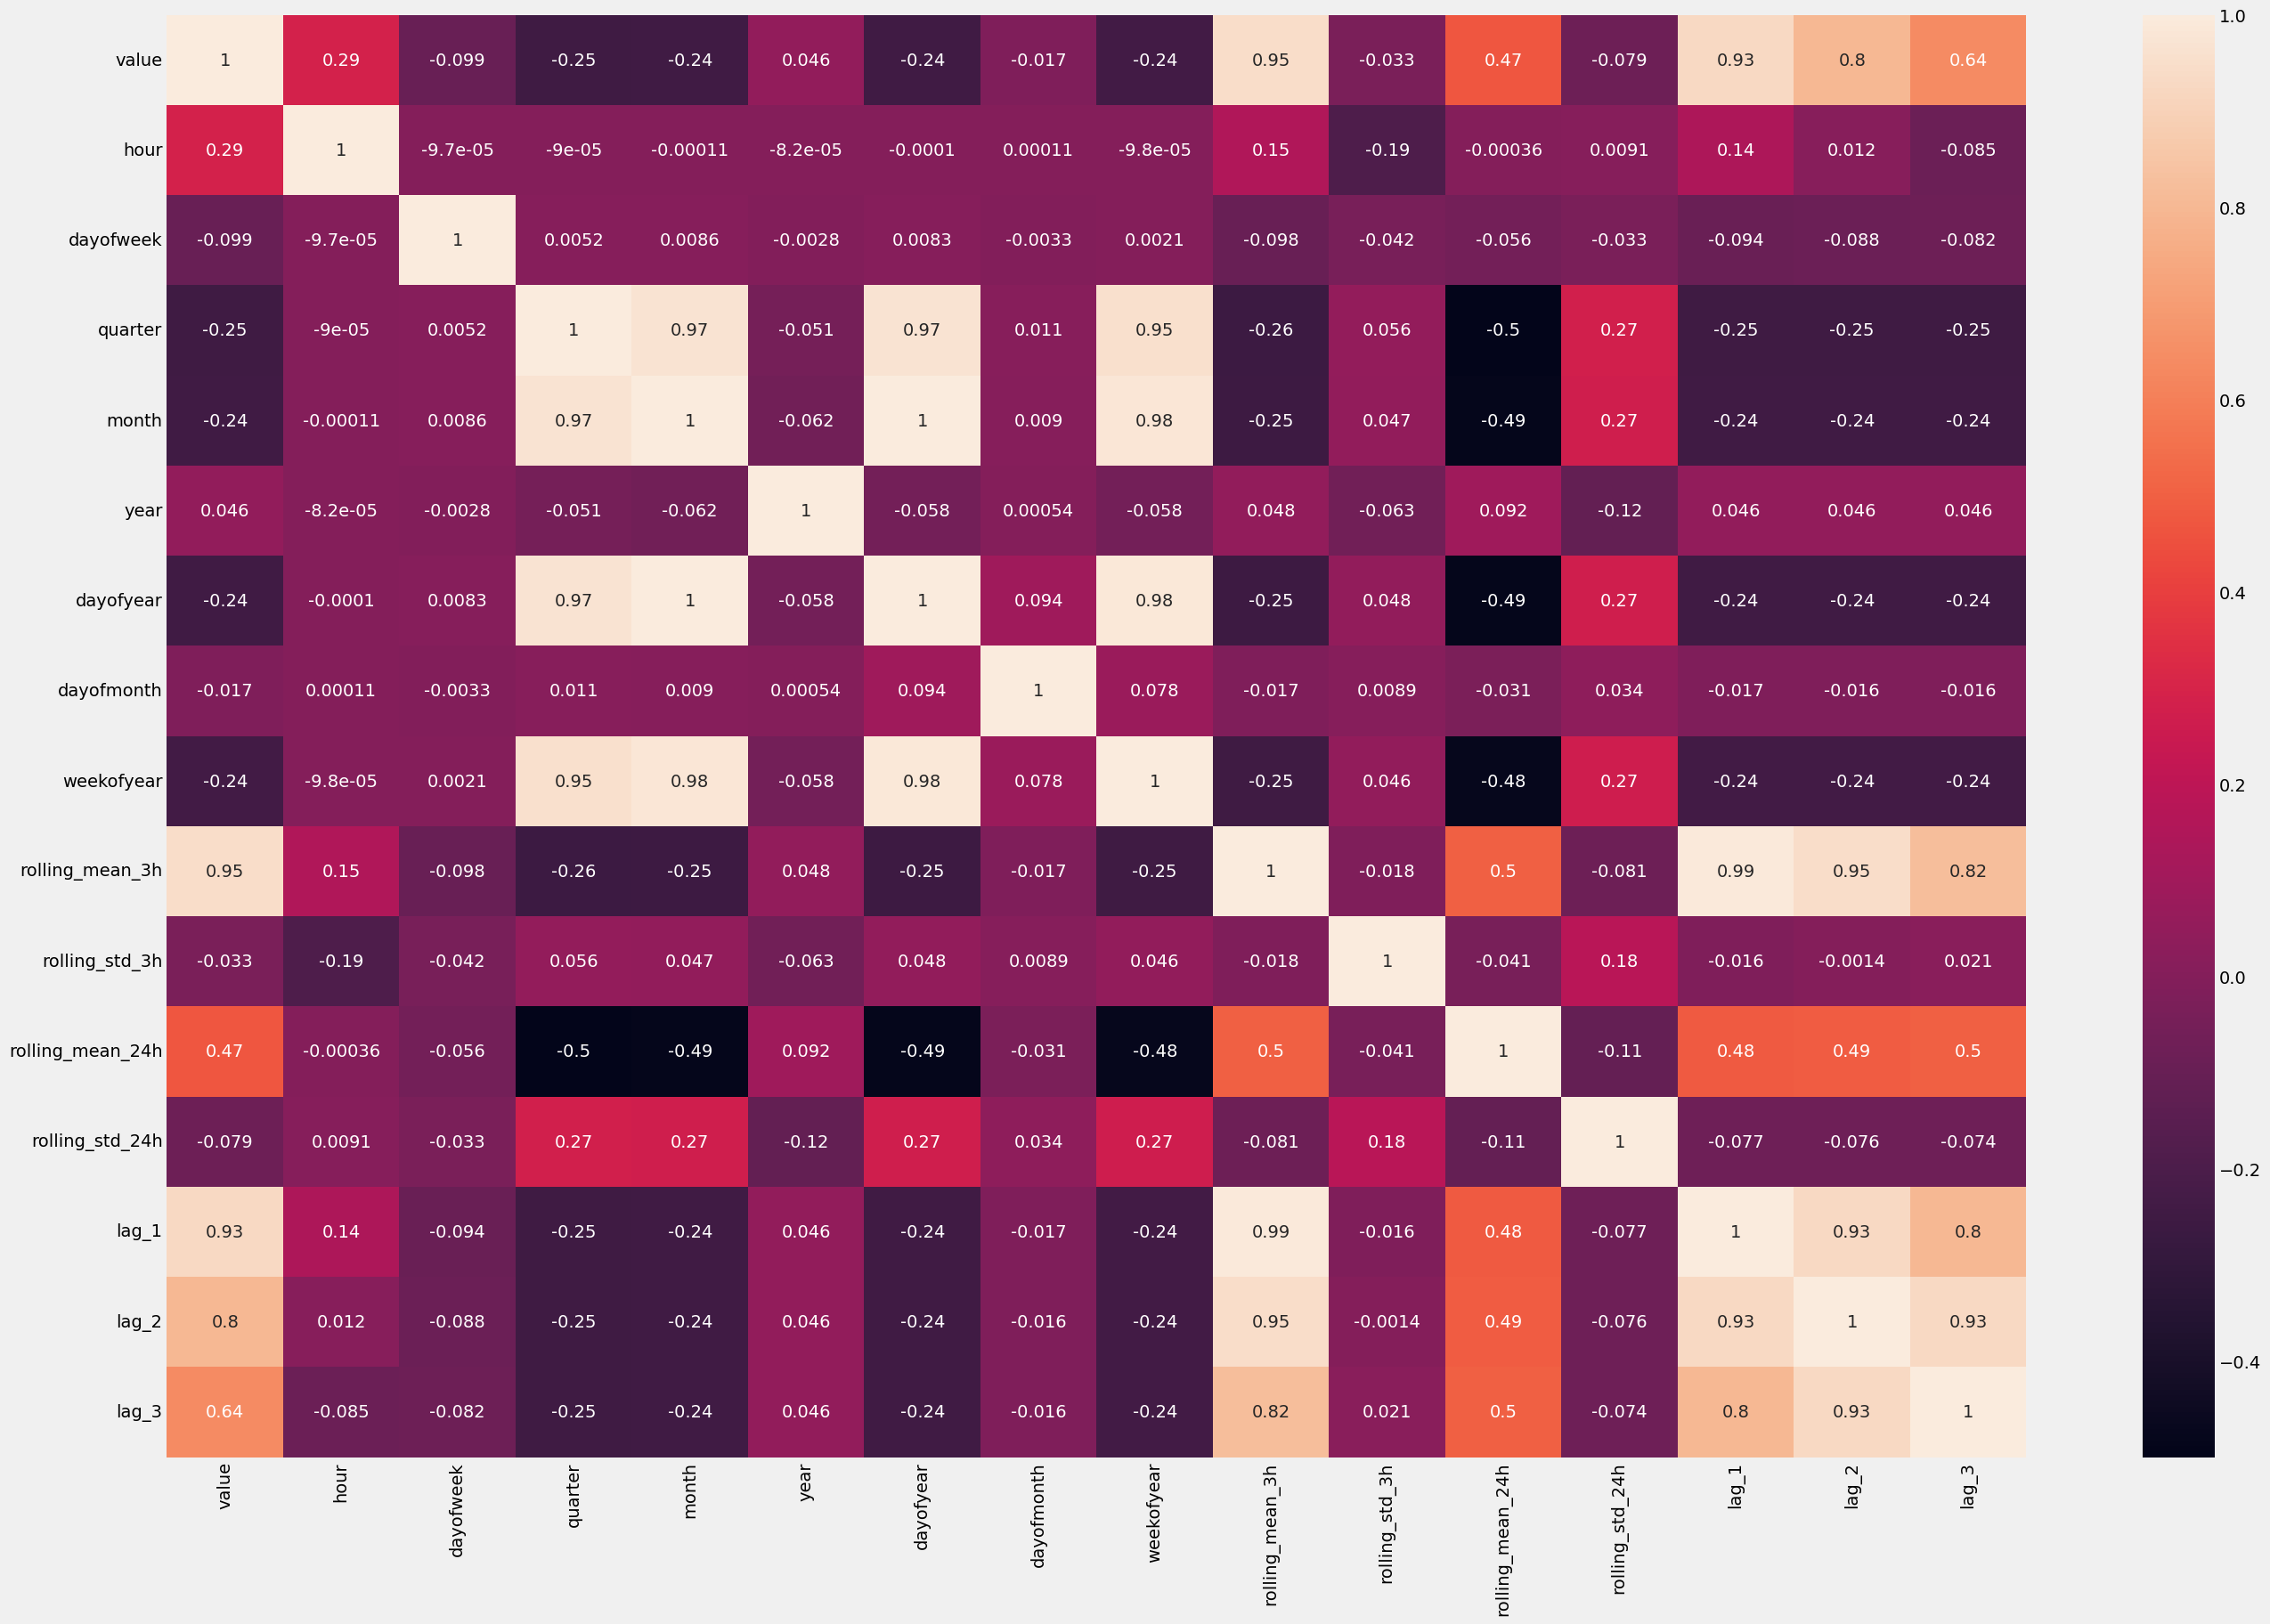

In [85]:
cor=df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(cor,annot=True)
plt.show()